# Plot taxonomic composition of sample

This notebook summarizes the strain-level breakdown of the infant gut microbiome metagenomic sample SRR3726337. The strain compositions were made using `sourmash gather`. `sourmash gather` compares one sequencing file (the query) against a database of genomes, and returns the minimum set of genomes that will cover (min set cov) all of the k-mers in the query file that are in the database.

By default, `sourmash gather` returns the following information:

- `intersect_bp`: the estimated number of base pairs that overlapped between the query and the matched genome
- `f_orig_query`: the fraction of the orginal query (metagenome sample) that matched against the genome
- `f_match`: the fraction of the genome that matched against the original query (metagenome sample)
- `f_unique_to_query`: the fraction of the matched genome that was unique to the query. Given that multiple matched genomes could cover the same portion of the query, this column reports the fraction of the query that was covered by the a matched genome, but doesn't allow multiple genomes to cover the same portion. As such, the genome that covers the most k-mers in a metagenome sample gets to "anchor" those k-mers, while other genomes that could cover those k-mers don't get any of them. This column removes the double counting problem that arises from having multiple genomes in a database that contain some of the same sequences.
- `f_unique_weighted`: This column weights the f_unique_to_query by the abundance of those k-mers. This is important in the context of metagenomes, as the abundance reflects the abundance of the organism.

These numbers are all based on genome-level matches. 
The plots below are based on the `f_unique_to_query` and the `f_unique_weighted`.

In [34]:
library(dplyr)
library(readr)
library(ggplot2)

In [2]:
# set working directory one level up
setwd("..")

In [38]:
# adjust plot size rendered inline
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 300)

## Read in `sourmash gather` results

In [3]:
read_gather <- function(path){
  gather <- read_csv(path, col_types = "ddddddddcccddddcccd")
}

In [40]:
# read in gather results and mutate query_filename to SRA run accession
gather_results_gtdb <- read_gather("outputs/sourmash_gather/SRR3726337_k31_scaled2000_gtdb-rs207.csv") %>%
  mutate(query_name = gsub(".abundtrim.fq.gz", "", basename(query_filename)))

In [41]:
# look at the results
gather_results_genbank

intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,filename,name,⋯,ksize,moltype,scaled,query_n_hashes,query_abundance,query_containment_ani,match_containment_ani,average_containment_ani,max_containment_ani,potential_false_negative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
5918000,0.151938383,1.00000000,0.151938383,0.151938383,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_001913895.1 Bacteroides vulgatus, ASM191389v1",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE
4718000,0.121129653,1.00000000,0.121129653,0.121129653,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_001931885.1 Citrobacter koseri, ASM193188v1",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE
4018000,0.103157895,0.97714008,0.103157895,0.103157895,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_019173815.2 Clostridioides difficile strain=2021EL-00553, ASM1917381v2",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE
3116000,0.080000000,0.99807445,0.079845956,0.079845956,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_001913975.1 Enterococcus faecalis, ASM191397v1",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE
2110000,0.054172015,0.45454545,0.054172015,0.054172015,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_000701705.1 Bilophila wadsworthia ATCC 49260 strain=ATCC 49260, ASM70170v1",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE
202000,0.005186136,0.08086469,0.005186136,0.005186136,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_009737075.1 Cutibacterium acnes strain=MIT 1879-a3-2, ASM973707v1",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE
1908000,0.048985879,0.04114490,0.004724005,0.004724005,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_902374275.1 Bilophila wadsworthia, MGYG-HGUT-01359",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE
1870000,0.048010270,0.01721664,0.001848524,0.001848524,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_018367825.1 Bilophila wadsworthia, ASM1836782v1",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE
1760000,0.045186136,0.01307531,0.001283697,0.001283697,NA,NA,NA,/group/ctbrowngrp/sourmash-db/genbank-2022.03/genbank-2022.03-bacteria-k31.zip,"GCA_018265765.1 Desulfovibrionaceae bacterium, ASM1826576v1",⋯,31,DNA,2000,19475,FALSE,NA,NA,NA,NA,FALSE


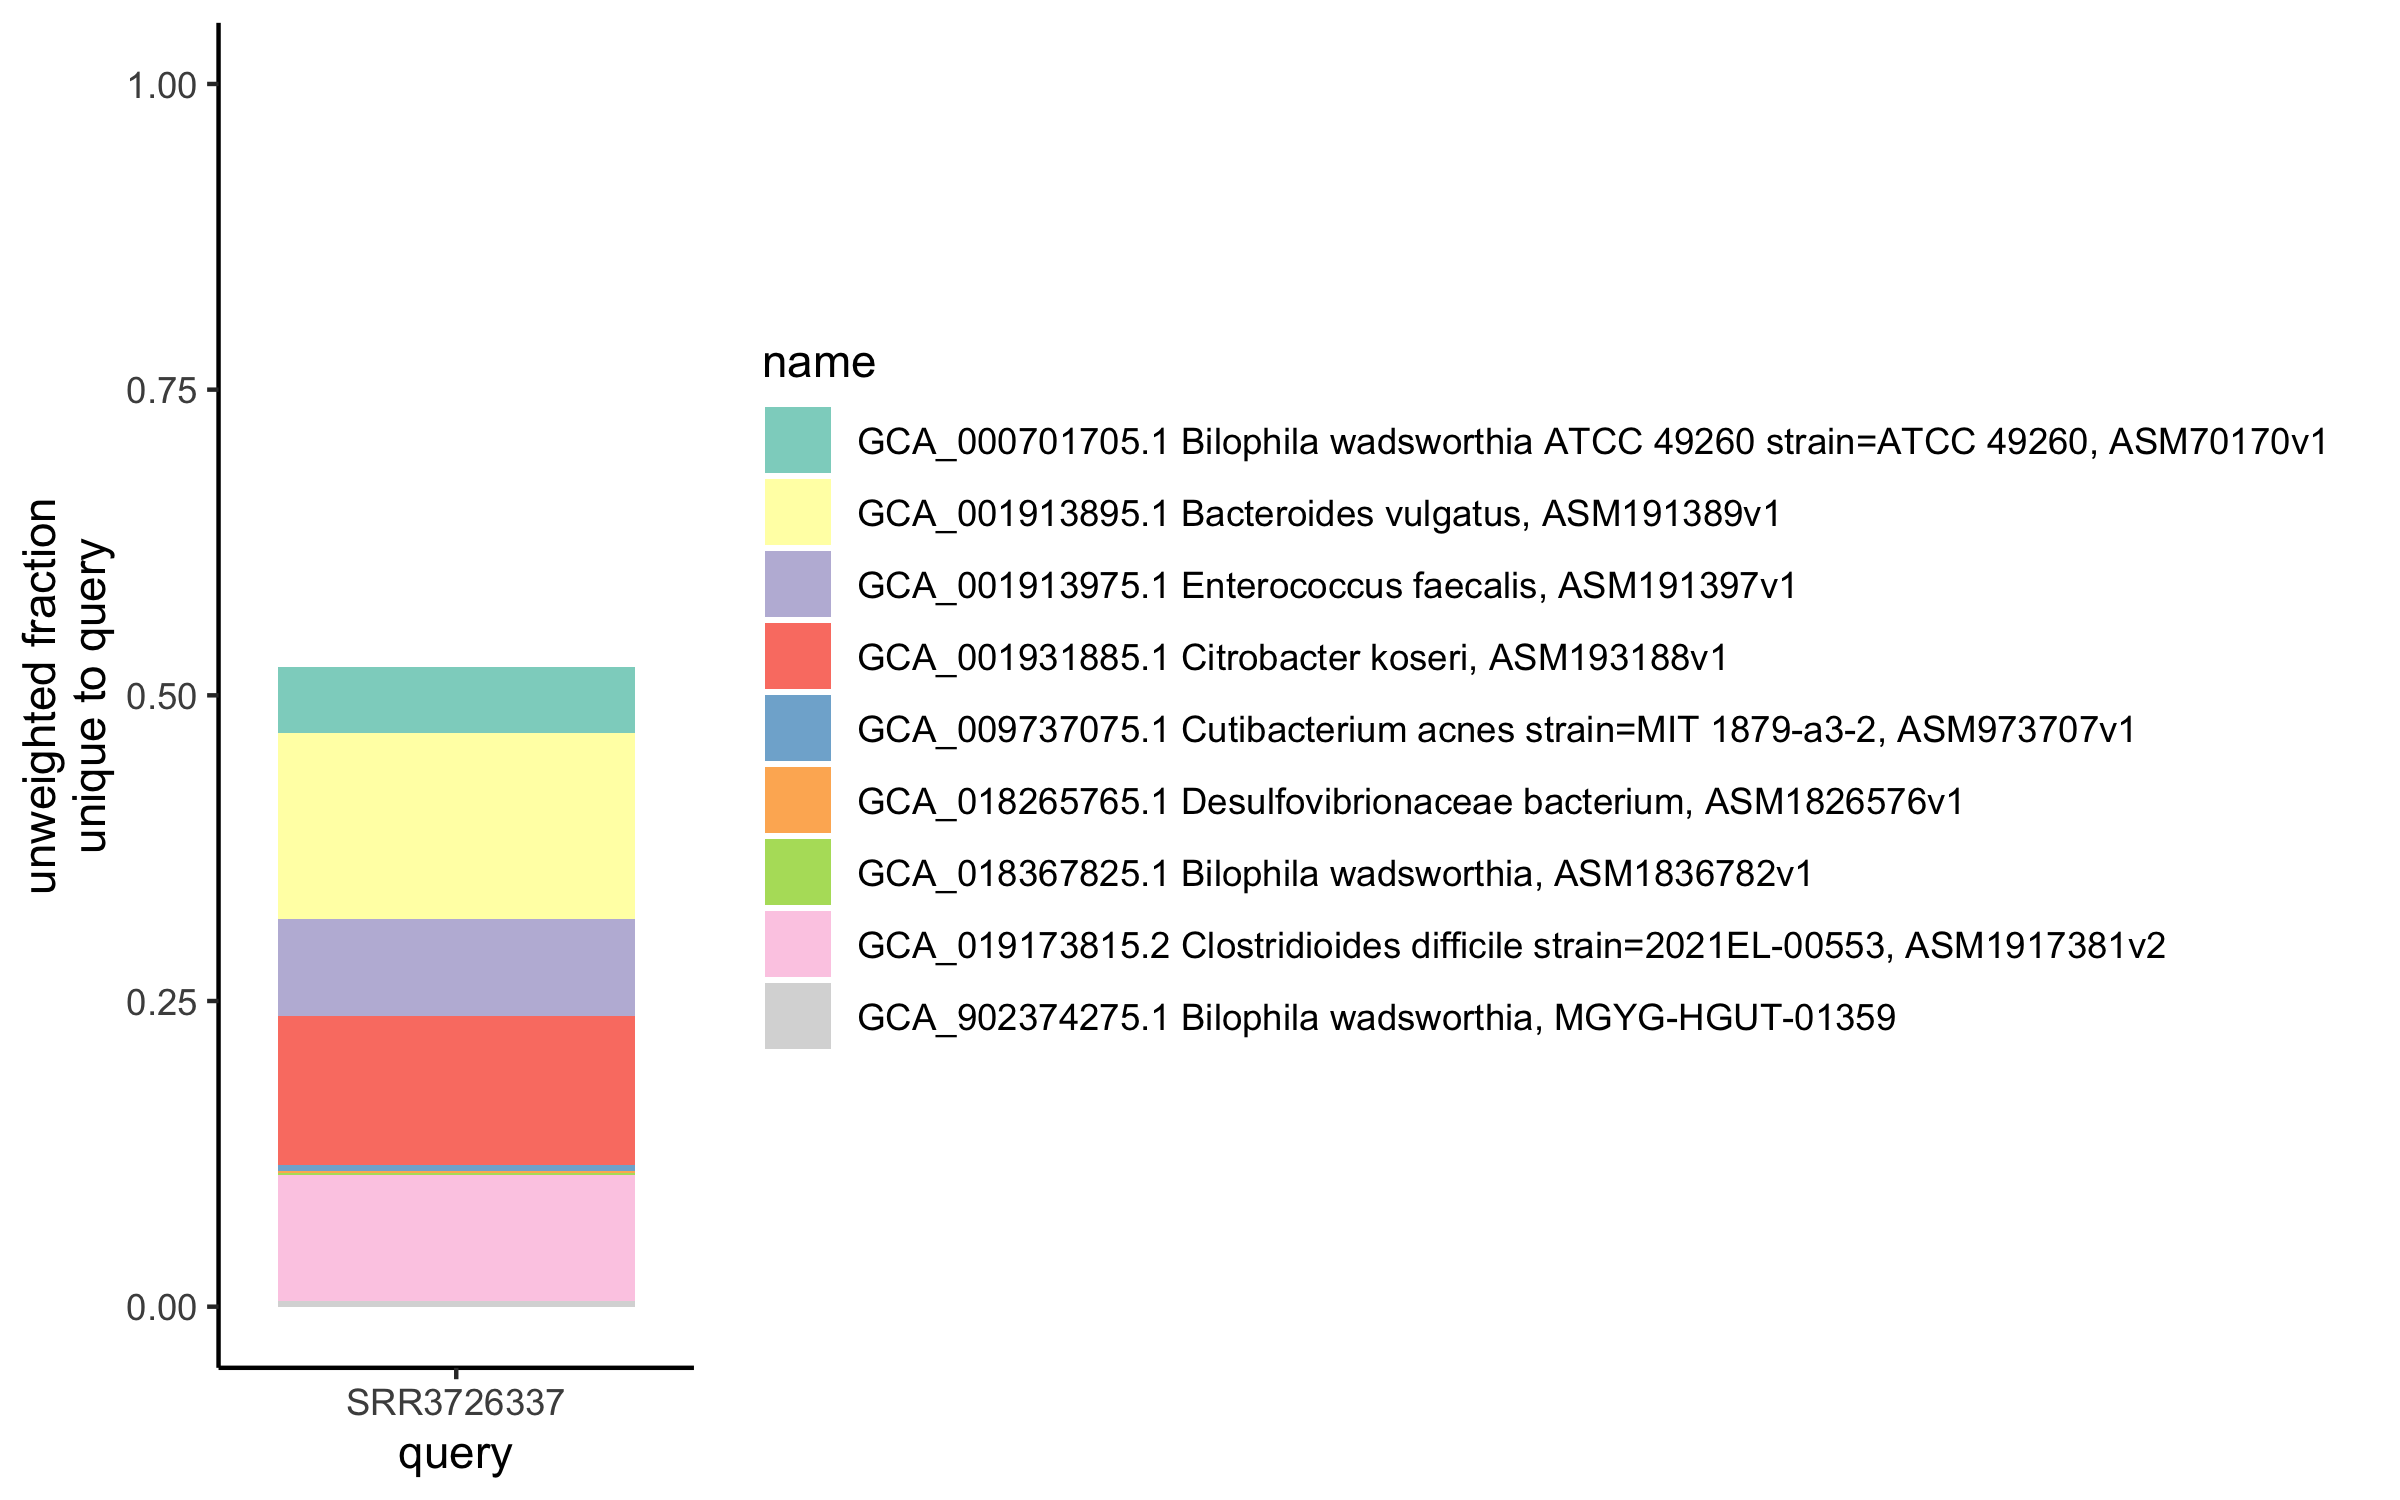

In [42]:
# plot taxonomic composition of sample
ggplot(gather_results_genbank, aes(x = query_name, y = f_unique_to_query, fill = name)) +
  geom_col() +
  theme_classic() +
  scale_fill_brewer(palette = "Set3") +
  ylim(0, 1) +
  labs(x = "query", y = "unweighted fraction\nunique to query")